In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# import sys
# sys.path.append('/Users/stuartjenkinswork/Documents/GitHub/GIR/GIR')

In [23]:
from FaIRv2 import *

IRF_calc = pd.read_csv('/Users/stuartjenkinswork/Documents/$$Work/2022:05:16 - Tonga eruption contribution to 1.5C crossing risk/stwv_irf_hansen_tp.csv')
IRF_calc_checks = pd.read_csv('/Users/stuartjenkinswork/Documents/$$Work/2022:05:16 - Tonga eruption contribution to 1.5C crossing risk/stwv_irf_hansen_tp_plusSensitivityChecks.csv')

ssp245_ERF = pd.read_csv('/Users/stuartjenkinswork/Documents/$$Datasets/RF/ssp_erf-master/SSPs/ERF_ssp245_1750-2500.csv', index_col=0)
ssp119_ERF = pd.read_csv('/Users/stuartjenkinswork/Documents/$$Datasets/RF/ssp_erf-master/SSPs/ERF_ssp119_1750-2500.csv', index_col=0)

# define colors 
# color1 = (215/255,25/255,28/255)
color2 = (150/255,150/255,150/255)
color1 = (100/255,180/255,9/255)
color3 = (255/255,255/255,191/255)
color5 = (10/255,100/255,200/255)
# color5 = (44/255,10/255,255/255)
color4 = (80/255,80/255,80/255)


In [24]:
background_ems_timeseries = return_empty_emissions(start_year=1750, end_year=2500, gases_in=['carbon_dioxide'])

background_forcing_timeseries = return_empty_forcing(start_year=1750, end_year=2500, df_to_copy=background_ems_timeseries)
tonga_forcing_timeseries_alt = return_empty_forcing(start_year=1750, end_year=2500, df_to_copy=background_ems_timeseries)
tonga_forcing_timeseries_alt_largespread = return_empty_forcing(start_year=1750, end_year=2500, df_to_copy=background_ems_timeseries)
tonga_forcing_timeseries_alt_narrowspread = return_empty_forcing(start_year=1750, end_year=2500, df_to_copy=background_ems_timeseries)

background_forcing_timeseries.loc[:,(0,'forcing')] = ssp245_ERF['total_anthropogenic'].values
tonga_forcing_timeseries_alt.loc[:,(0,'forcing')] = ssp245_ERF['total_anthropogenic'].values
tonga_forcing_timeseries_alt.loc[2022:2028,(0,'forcing')] += IRF_calc['net_IRF'][::12].values
tonga_forcing_timeseries_alt_largespread.loc[:,(0,'forcing')] = ssp245_ERF['total_anthropogenic'].values
tonga_forcing_timeseries_alt_largespread.loc[2022:2028,(0,'forcing')] += IRF_calc_checks['widespread'][::12].values
tonga_forcing_timeseries_alt_narrowspread.loc[:,(0,'forcing')] = ssp245_ERF['total_anthropogenic'].values
tonga_forcing_timeseries_alt_narrowspread.loc[2022:2028,(0,'forcing')] += IRF_calc_checks['narrowspread'][::12].values

#-------

background_forcing_timeseries_19 = return_empty_forcing(start_year=1750, end_year=2500, df_to_copy=background_ems_timeseries)
tonga_forcing_timeseries_alt_19 = return_empty_forcing(start_year=1750, end_year=2500, df_to_copy=background_ems_timeseries)
tonga_forcing_timeseries_alt_19_largespread = return_empty_forcing(start_year=1750, end_year=2500, df_to_copy=background_ems_timeseries)
tonga_forcing_timeseries_alt_19_narrowspread = return_empty_forcing(start_year=1750, end_year=2500, df_to_copy=background_ems_timeseries)

background_forcing_timeseries_19.loc[:,(0,'forcing')] = ssp119_ERF['total_anthropogenic'].values
tonga_forcing_timeseries_alt_19.loc[:,(0,'forcing')] = ssp119_ERF['total_anthropogenic'].values
tonga_forcing_timeseries_alt_19.loc[2022:2028,(0,'forcing')] += IRF_calc['net_IRF'][::12].values
tonga_forcing_timeseries_alt_19_largespread.loc[:,(0,'forcing')] = ssp119_ERF['total_anthropogenic'].values
tonga_forcing_timeseries_alt_19_largespread.loc[2022:2028,(0,'forcing')] += IRF_calc_checks['widespread'][::12].values
tonga_forcing_timeseries_alt_19_narrowspread.loc[:,(0,'forcing')] = ssp119_ERF['total_anthropogenic'].values
tonga_forcing_timeseries_alt_19_narrowspread.loc[2022:2028,(0,'forcing')] += IRF_calc_checks['narrowspread'][::12].values


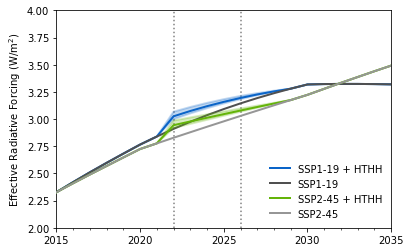

In [40]:
fig, ax = plt.subplots(figsize=(6,4))

plt.plot(tonga_forcing_timeseries_alt_19, color=color5, label='SSP1-19 + HTHH', linewidth=2, zorder=5)
plt.plot(background_forcing_timeseries_19, color=color4, label='SSP1-19', linewidth=2, zorder=6)

plt.fill_between(np.arange(1750,2501), tonga_forcing_timeseries_alt_19_narrowspread.values.squeeze(), tonga_forcing_timeseries_alt_19_largespread.values.squeeze(), color=color5, linewidth=2, alpha=0.25, zorder=4)
# plt.plot(, color=color5, label='SSP1-19 + HTHH', linewidth=2)

plt.plot(tonga_forcing_timeseries_alt, color=color1, label='SSP2-45 + HTHH', linewidth=2, zorder=8)
plt.plot(background_forcing_timeseries, color=color2, label='SSP2-45', linewidth=2, zorder=9)

plt.fill_between(np.arange(1750,2501), tonga_forcing_timeseries_alt_narrowspread.values.squeeze(), tonga_forcing_timeseries_alt_largespread.values.squeeze(), color=color1, linewidth=2, alpha=0.25, zorder=7)
# plt.plot(, color=color1, label='SSP2-45 + HTHH', linewidth=2)

plt.xlim(2015,2035)
plt.ylim(2,4)

plt.legend(loc='lower right', edgecolor='none', framealpha=0.0, fontsize=10)

plt.ylabel('Effective Radiative Forcing (W/m$^2$)')
plt.axvline(x=2022,linestyle=':',color='black',alpha=0.5)
plt.axvline(x=2026,linestyle=':',color='black',alpha=0.5)

g = ax.set_xticks([2015,2020,2025,2030,2035], minor=False)
h = ax.set_xticks([2016,2017,2018,2019,2021,2022,2023,2024,2026,2027,2028,2029,2031,2032,2033,2034], minor=True)

# plt.savefig('ERF_timeseries_newcolours.pdf', dpi=400, bbox_inches='tight')

In [26]:
gas_defaults = get_gas_parameter_defaults(choose_gases=['carbon_dioxide'])
therm_defaults = get_thermal_parameter_defaults()

In [27]:
background_response = run_FaIR(emissions_in=background_ems_timeseries, forcing_in=background_forcing_timeseries, gas_parameters=gas_defaults, thermal_parameters=therm_defaults)
tonga_response = run_FaIR(emissions_in=background_ems_timeseries, forcing_in=tonga_forcing_timeseries_alt, gas_parameters=gas_defaults, thermal_parameters=therm_defaults)
tonga_response_largespread = run_FaIR(emissions_in=background_ems_timeseries, forcing_in=tonga_forcing_timeseries_alt_largespread, gas_parameters=gas_defaults, thermal_parameters=therm_defaults)
tonga_response_narrowspread = run_FaIR(emissions_in=background_ems_timeseries, forcing_in=tonga_forcing_timeseries_alt_narrowspread, gas_parameters=gas_defaults, thermal_parameters=therm_defaults)

background_response_19 = run_FaIR(emissions_in=background_ems_timeseries, forcing_in=background_forcing_timeseries_19, gas_parameters=gas_defaults, thermal_parameters=therm_defaults)
tonga_response_19 = run_FaIR(emissions_in=background_ems_timeseries, forcing_in=tonga_forcing_timeseries_alt_19, gas_parameters=gas_defaults, thermal_parameters=therm_defaults)
tonga_response_19_largespread = run_FaIR(emissions_in=background_ems_timeseries, forcing_in=tonga_forcing_timeseries_alt_19_largespread, gas_parameters=gas_defaults, thermal_parameters=therm_defaults)
tonga_response_19_narrowspread = run_FaIR(emissions_in=background_ems_timeseries, forcing_in=tonga_forcing_timeseries_alt_19_narrowspread, gas_parameters=gas_defaults, thermal_parameters=therm_defaults)



Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['carbon_dioxide'] forcing agents, between 1750.0 and 2500.0...
Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['carbon_dioxide'] forcing agents, between 1750.0 and 2500.0...
Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['carbon_dioxide'] forcing agents, between 1750.0 and 2500.0...
Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['carbon_dioxide'] forcing agents, between 1750.0 and 2500.0...
Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['carbon_dioxide'] forcing agents, between 1750.0 and 2500.0...
Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['carbon_dioxide'] forcing agents, between 1750.0 and 2500.0...
Integrating 1 scenarios, 1 gas cycle parameter sets, 1 the

(1.0, 1.75)

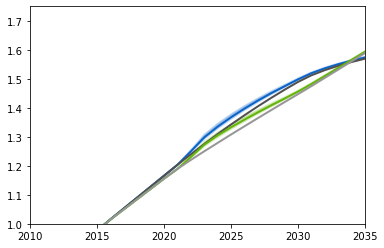

In [28]:
plt.plot(np.arange(1750,2501), tonga_response_19['T'].loc[:,(0,'default')].values - np.mean(tonga_response_19['T'].loc[1850:1900,(0,'default')].values), color=color5, linewidth=2)
plt.fill_between(np.arange(1750,2501), tonga_response_19_narrowspread['T'].loc[:,(0,'default')].values - np.mean(tonga_response_19_narrowspread['T'].loc[1850:1900,(0,'default')].values), tonga_response_19_largespread['T'].loc[:,(0,'default')].values - np.mean(tonga_response_19_largespread['T'].loc[1850:1900,(0,'default')].values), color=color5, linewidth=2, alpha=0.25)
plt.plot(np.arange(1750,2501), background_response_19['T'].loc[:,(0,'default')].values - np.mean(background_response_19['T'].loc[1850:1900,(0,'default')].values), color=color4, linewidth=2)

plt.plot(np.arange(1750,2501), tonga_response['T'].loc[:,(0,'default')].values - np.mean(tonga_response['T'].loc[1850:1900,(0,'default')].values), color=color1, linewidth=2)
plt.fill_between(np.arange(1750,2501), tonga_response_narrowspread['T'].loc[:,(0,'default')].values - np.mean(tonga_response_narrowspread['T'].loc[1850:1900,(0,'default')].values), tonga_response_largespread['T'].loc[:,(0,'default')].values - np.mean(tonga_response_largespread['T'].loc[1850:1900,(0,'default')].values), color=color1, linewidth=2, alpha=0.25)
plt.plot(np.arange(1750,2501), background_response['T'].loc[:,(0,'default')].values - np.mean(background_response['T'].loc[1850:1900,(0,'default')].values), color=color2, linewidth=2)

plt.xlim(2010,2035)
plt.ylim(1.0,1.75)

In [29]:
n = 50000
tonga_temps = np.zeros((20,n))
tonga_temps_largespread = np.zeros((20,n))
tonga_temps_narrowspread = np.zeros((20,n))
background_temps = np.zeros((20,n))

tonga_temps_19 = np.zeros((20,n))
tonga_temps_19_largespread = np.zeros((20,n))
tonga_temps_19_narrowspread = np.zeros((20,n))
background_temps_19 = np.zeros((20,n))

for i in range(0,20):
    rand_vals = np.random.normal(0,0.191,n)
    tonga_temps[i,:] = tonga_response['T'].loc[2015:2034,(0,'default')].values[i] - np.mean(tonga_response['T'].loc[1850:1900,(0,'default')].values) + rand_vals
    rand_vals = np.random.normal(0,0.191,n)
    tonga_temps_largespread[i,:] = tonga_response_largespread['T'].loc[2015:2034,(0,'default')].values[i] - np.mean(tonga_response_largespread['T'].loc[1850:1900,(0,'default')].values) + rand_vals
    rand_vals = np.random.normal(0,0.191,n)
    tonga_temps_narrowspread[i,:] = tonga_response_narrowspread['T'].loc[2015:2034,(0,'default')].values[i] - np.mean(tonga_response_narrowspread['T'].loc[1850:1900,(0,'default')].values) + rand_vals
    rand_vals = np.random.normal(0,0.191,n)
    background_temps[i,:] = background_response['T'].loc[2015:2034,(0,'default')].values[i] - np.mean(background_response['T'].loc[1850:1900,(0,'default')].values) + rand_vals
    
    rand_vals = np.random.normal(0,0.191,n)
    tonga_temps_19[i,:] = tonga_response_19['T'].loc[2015:2034,(0,'default')].values[i] - np.mean(tonga_response_19['T'].loc[1850:1900,(0,'default')].values) + rand_vals
    rand_vals = np.random.normal(0,0.191,n)
    tonga_temps_19_largespread[i,:] = tonga_response_19_largespread['T'].loc[2015:2034,(0,'default')].values[i] - np.mean(tonga_response_19_largespread['T'].loc[1850:1900,(0,'default')].values) + rand_vals
    rand_vals = np.random.normal(0,0.191,n)
    tonga_temps_19_narrowspread[i,:] = tonga_response_19_narrowspread['T'].loc[2015:2034,(0,'default')].values[i] - np.mean(tonga_response_19_narrowspread['T'].loc[1850:1900,(0,'default')].values) + rand_vals
    rand_vals = np.random.normal(0,0.191,n)
    background_temps_19[i,:] = background_response_19['T'].loc[2015:2034,(0,'default')].values[i] - np.mean(background_response_19['T'].loc[1850:1900,(0,'default')].values) + rand_vals


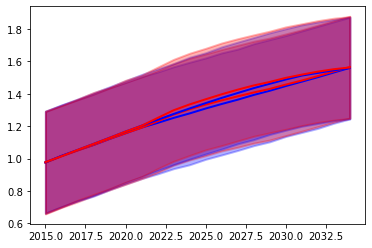

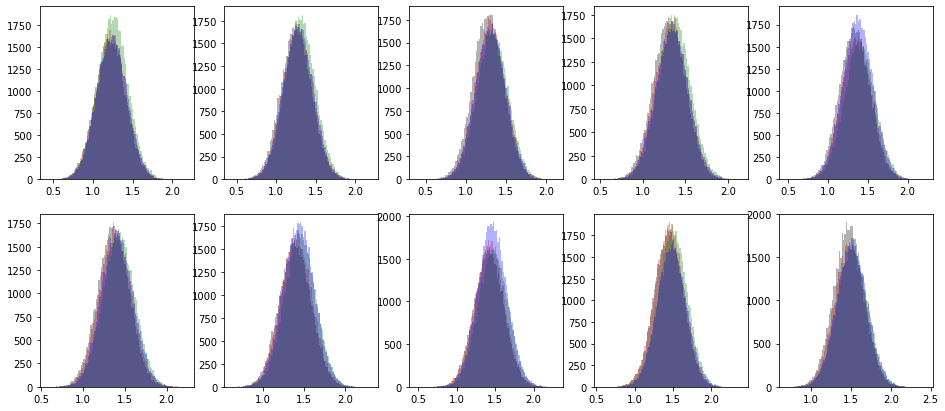

In [30]:
plt.plot(np.arange(2015,2035), np.mean(background_temps,axis=1), color='blue', linewidth=2, alpha=1)
plt.plot(np.arange(2015,2035), np.mean(tonga_temps,axis=1), color='red', linewidth=2, alpha=1)

plt.fill_between(np.arange(2015,2035), np.percentile(background_temps,5,axis=1), np.percentile(background_temps,95,axis=1), color='blue', linewidth=2, alpha=0.3)
plt.fill_between(np.arange(2015,2035), np.percentile(tonga_temps,5,axis=1), np.percentile(tonga_temps,95,axis=1), color='red', linewidth=2, alpha=0.3)


plt.plot(np.arange(2015,2035), np.mean(background_temps_19,axis=1), color='blue', linewidth=2, alpha=1)
plt.plot(np.arange(2015,2035), np.mean(tonga_temps_19,axis=1), color='red', linewidth=2, alpha=1)

plt.fill_between(np.arange(2015,2035), np.percentile(background_temps_19,5,axis=1), np.percentile(background_temps_19,95,axis=1), color='blue', linewidth=2, alpha=0.3)
plt.fill_between(np.arange(2015,2035), np.percentile(tonga_temps_19,5,axis=1), np.percentile(tonga_temps_19,95,axis=1), color='red', linewidth=2, alpha=0.3)

fig, ax = plt.subplots(2,5,figsize=(16,7))

for i in range(0,10):
    h = ax[int(i/5),int(i%5)].hist(tonga_temps[i+7], bins=100, color='red', alpha=0.3)
    h = ax[int(i/5),int(i%5)].hist(background_temps[i+7], bins=100, color='black', alpha=0.3)
    
    h = ax[int(i/5),int(i%5)].hist(tonga_temps_19[i+7], bins=100, color='green', alpha=0.3)
    h = ax[int(i/5),int(i%5)].hist(background_temps_19[i+7], bins=100, color='blue', alpha=0.3)
    

[0.929   0.90256 0.87654 0.84212 0.80166]
0.5038331645409151
0.574336519624
[0.9139  0.88146 0.84032 0.79668 0.7419 ]
0.5998938082102474
0.6668330570376213


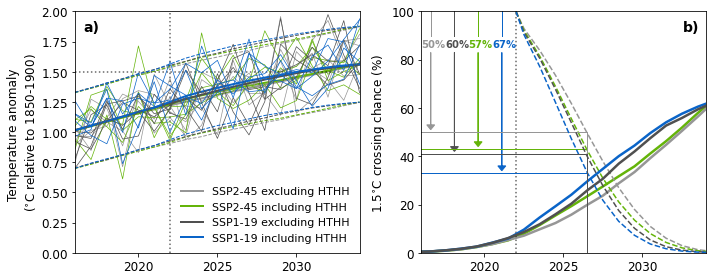

In [31]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(np.arange(2015,2035), np.percentile(background_temps,5,axis=1), color=color2, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(background_temps,95,axis=1), color=color2, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(tonga_temps,5,axis=1), color=color1, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(tonga_temps,95,axis=1), color=color1, linewidth=1, alpha=1, linestyle='--')

ax[0].plot(np.arange(2015,2035), np.mean(background_temps,axis=1), color=color2, linewidth=2, alpha=1, label='SSP2-45 excluding HTHH')
ax[0].plot(np.arange(2015,2035), np.mean(tonga_temps,axis=1), color=color1, linewidth=2, alpha=1, label='SSP2-45 including HTHH')

ax[0].plot(np.arange(2015,2035), background_temps[:,1500::10000], color=color2, linewidth=0.7, alpha=1)
ax[0].plot(np.arange(2015,2035), tonga_temps[:,1500::10000], color=color1, linewidth=0.7, alpha=1)

l = ax[0].set_xticks([2015,2020,2025,2030,2035])

ax[1].plot(np.arange(2015,2035)+0.5, 100*np.sum(tonga_temps>1.5, axis=1)/n, color=color1, linewidth=2.5)
ax[1].plot(np.arange(2015,2035)+0.5, 100*np.sum(background_temps>1.5, axis=1)/n, color=color2, linewidth=2.5)

l = ax[1].set_xticks([2015,2020,2025,2030,2035])

ax[0].legend(loc='lower right', framealpha=0.0, edgecolor='none', fontsize=11)

ax[0].set_ylabel('Temperature anomaly \n($^{\circ}$C relative to 1850-1900)', fontsize=12)
ax[1].set_ylabel('1.5$^{\circ}$C crossing chance (%)', fontsize=12)

ax[0].set_xlim(2015,2034)
ax[1].set_xlim(2015,2034)

ax[0].axvline(x=2022, color='black', linestyle=':', alpha=0.6)
ax[1].axvline(x=2022, color='black', linestyle=':', alpha=0.6)

ax[0].axhline(y=1.5, color='black', linestyle=':', alpha=0.6)

ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

print(1 - np.sum(background_temps[7:12]>1.5, axis=1)/n)

print(1 - np.prod(1 - np.sum(background_temps[7:12]>1.5, axis=1)/n))
print(1 - np.prod(1 - np.sum(tonga_temps[7:12]>1.5, axis=1)/n))

background_cum_prod_15_not_exceeded = np.zeros(2035-2022+1)
background_cum_prod_15_not_exceeded[0] = 100
background_cum_prod_15_not_exceeded[1:] = 100*np.cumprod(1 - np.sum(background_temps[7:]>1.5, axis=1)/n)
tonga_cum_prod_15_not_exceeded = np.zeros(2035-2022+1)
tonga_cum_prod_15_not_exceeded[0] = 100
tonga_cum_prod_15_not_exceeded[1:] = 100*np.cumprod(1 - np.sum(tonga_temps[7:]>1.5, axis=1)/n)
ax[1].plot([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], background_cum_prod_15_not_exceeded, color=color2, linestyle='--')
ax[1].plot([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], tonga_cum_prod_15_not_exceeded, color=color1, linestyle='--')



ax[1].text(2016,85,str(np.round(100 - 100*np.prod(1 - np.sum(background_temps[7:12]>1.5, axis=1)/n),0))[:-2]+'%', fontweight='bold', color=color2)
ax[1].text(2019,85,str(np.round(100 - 100*np.prod(1 - np.sum(tonga_temps[7:12]>1.5, axis=1)/n),0))[:-2]+'%', fontweight='bold', color=color1)
ax[1].plot([2016.6,2016.6],[100,90], color=color2, linewidth=1.0, alpha=1, linestyle='-')
ax[1].plot([2019.6,2019.6],[100,90], color=color1, linewidth=1.0, alpha=1, linestyle='-')

ax[1].arrow(2016.6,83,0,-30, head_width=0.5, head_length=2, linestyle='-', color=color2, linewidth=1.0, alpha=1)
ax[1].arrow(2019.6,83,0,-37, head_width=0.5, head_length=2, linestyle='-', color=color1, linewidth=1.0, alpha=1)

ax[1].set_ylim(0,100)
ax[1].set_xlim(2016,2034)

ax[0].set_ylim(0,2.0)

ax[1].plot([2014.5,2026.5],[100-57,100-57], color=color1, alpha=1, linewidth=1.0)
ax[1].plot([2014.5,2026.5],[100-50,100-50], color=color2, alpha=1, linewidth=1.0)

ax[1].plot([2026.5,2026.5],[0,100-57], color=color1, alpha=1, linewidth=1.0)
ax[1].plot([2026.5,2026.5],[0,100-50], color=color2, alpha=1, linewidth=1.0)

fig.tight_layout()

# fig.savefig('increased_risk.png', dpi=400, bbox_inches='tight')










ax[0].plot(np.arange(2015,2035), np.percentile(background_temps_19,5,axis=1), color=color4, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(background_temps_19,95,axis=1), color=color4, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(tonga_temps_19,5,axis=1), color=color5, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(tonga_temps_19,95,axis=1), color=color5, linewidth=1, alpha=1, linestyle='--')

ax[0].plot(np.arange(2015,2035), np.mean(background_temps_19,axis=1), color=color4, linewidth=2, alpha=1, label='SSP1-19 excluding HTHH')
ax[0].plot(np.arange(2015,2035), np.mean(tonga_temps_19,axis=1), color=color5, linewidth=2, alpha=1, label='SSP1-19 including HTHH')

ax[0].plot(np.arange(2015,2035), background_temps_19[:,1500::10000], color=color4, linewidth=0.7, alpha=1)
ax[0].plot(np.arange(2015,2035), tonga_temps_19[:,1500::10000], color=color5, linewidth=0.7, alpha=1)

l = ax[0].set_xticks([2015,2020,2025,2030,2035])

ax[1].plot(np.arange(2015,2035)+0.5, 100*np.sum(tonga_temps_19>1.5, axis=1)/n, color=color5, linewidth=2.5)
ax[1].plot(np.arange(2015,2035)+0.5, 100*np.sum(background_temps_19>1.5, axis=1)/n, color=color4, linewidth=2.5)

l = ax[1].set_xticks([2015,2020,2025,2030,2035])

ax[0].legend(loc='lower right', framealpha=0.0, edgecolor='none', fontsize=11)

print(1 - np.sum(background_temps_19[7:12]>1.5, axis=1)/n)

print(1 - np.prod(1 - np.sum(background_temps_19[7:12]>1.5, axis=1)/n))
print(1 - np.prod(1 - np.sum(tonga_temps_19[7:12]>1.5, axis=1)/n))

background_cum_prod_15_not_exceeded_19 = np.zeros(2035-2022+1)
background_cum_prod_15_not_exceeded_19[0] = 100
background_cum_prod_15_not_exceeded_19[1:] = 100*np.cumprod(1 - np.sum(background_temps_19[7:]>1.5, axis=1)/n)
tonga_cum_prod_15_not_exceeded_19 = np.zeros(2035-2022+1)
tonga_cum_prod_15_not_exceeded_19[0] = 100
tonga_cum_prod_15_not_exceeded_19[1:] = 100*np.cumprod(1 - np.sum(tonga_temps_19[7:]>1.5, axis=1)/n)
ax[1].plot([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], background_cum_prod_15_not_exceeded_19, color=color4, linestyle='--')
ax[1].plot([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], tonga_cum_prod_15_not_exceeded_19, color=color5, linestyle='--')



ax[1].text(2017.5,85,str(np.round(100 - 100*np.prod(1 - np.sum(background_temps_19[7:12]>1.5, axis=1)/n),0))[:-2]+'%', fontweight='bold', color=color4)
ax[1].text(2020.5,85,str(np.round(100 - 100*np.prod(1 - np.sum(tonga_temps_19[7:12]>1.5, axis=1)/n),0))[:-2]+'%', fontweight='bold', color=color5)
ax[1].plot([2018.1,2018.1],[100,90], color=color4, linewidth=1.0, alpha=1, linestyle='-')
ax[1].plot([2021.1,2021.1],[100,90], color=color5, linewidth=1.0, alpha=1, linestyle='-')

ax[1].arrow(2018.1,83,0,-39, head_width=0.5, head_length=2, linestyle='-', color=color4, linewidth=1.0, alpha=1)
ax[1].arrow(2021.1,83,0,-47, head_width=0.5, head_length=2, linestyle='-', color=color5, linewidth=1.0, alpha=1)

ax[1].set_ylim(0,100)
ax[1].set_xlim(2016,2034)

ax[0].set_xlim(2016,2034)
ax[0].set_ylim(0,2.0)

ax[1].plot([2014.5,2026.5],[100-67,100-67], color=color5, alpha=1, linewidth=1.0)
ax[1].plot([2014.5,2026.5],[100-59,100-59], color=color4, alpha=1, linewidth=1.0)

ax[1].plot([2026.5,2026.5],[0,100-67], color=color5, alpha=1, linewidth=1.0)
ax[1].plot([2026.5,2026.5],[0,100-59], color=color4, alpha=1, linewidth=1.0)

ax[0].text(0.03,0.92, 'a)', fontweight='bold', fontsize=14, transform=ax[0].transAxes)
ax[1].text(0.92,0.92, 'b)', fontweight='bold', fontsize=14, transform=ax[1].transAxes)

fig.tight_layout()

# fig.savefig('increased_risk.png', dpi=400, bbox_inches='tight')


[0.929   0.90256 0.87654 0.84212 0.80166]
0.5038331645409151
0.6026340742846105
[0.9139  0.88146 0.84032 0.79668 0.7419 ]
0.5998938082102474
0.6920873590251924


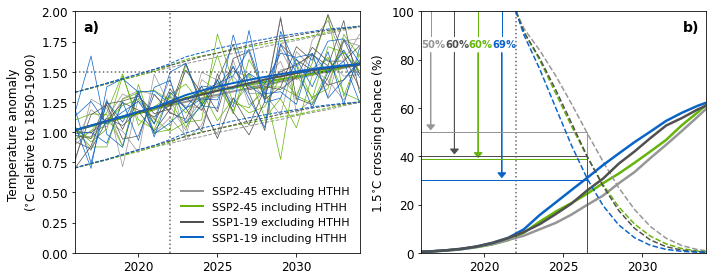

In [32]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(np.arange(2015,2035), np.percentile(background_temps,5,axis=1), color=color2, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(background_temps,95,axis=1), color=color2, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(tonga_temps_largespread,5,axis=1), color=color1, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(tonga_temps_largespread,95,axis=1), color=color1, linewidth=1, alpha=1, linestyle='--')

ax[0].plot(np.arange(2015,2035), np.mean(background_temps,axis=1), color=color2, linewidth=2, alpha=1, label='SSP2-45 excluding HTHH')
ax[0].plot(np.arange(2015,2035), np.mean(tonga_temps_largespread,axis=1), color=color1, linewidth=2, alpha=1, label='SSP2-45 including HTHH')

ax[0].plot(np.arange(2015,2035), background_temps[:,1500::10000], color=color2, linewidth=0.7, alpha=1)
ax[0].plot(np.arange(2015,2035), tonga_temps_largespread[:,1500::10000], color=color1, linewidth=0.7, alpha=1)

l = ax[0].set_xticks([2015,2020,2025,2030,2035])

ax[1].plot(np.arange(2015,2035)+0.5, 100*np.sum(tonga_temps_largespread>1.5, axis=1)/n, color=color1, linewidth=2.5)
ax[1].plot(np.arange(2015,2035)+0.5, 100*np.sum(background_temps>1.5, axis=1)/n, color=color2, linewidth=2.5)

l = ax[1].set_xticks([2015,2020,2025,2030,2035])

ax[0].legend(loc='lower right', framealpha=0.0, edgecolor='none', fontsize=11)

ax[0].set_ylabel('Temperature anomaly \n($^{\circ}$C relative to 1850-1900)', fontsize=12)
ax[1].set_ylabel('1.5$^{\circ}$C crossing chance (%)', fontsize=12)

ax[0].set_xlim(2015,2034)
ax[1].set_xlim(2015,2034)

ax[0].axvline(x=2022, color='black', linestyle=':', alpha=0.6)
ax[1].axvline(x=2022, color='black', linestyle=':', alpha=0.6)

ax[0].axhline(y=1.5, color='black', linestyle=':', alpha=0.6)

ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

print(1 - np.sum(background_temps[7:12]>1.5, axis=1)/n)

print(1 - np.prod(1 - np.sum(background_temps[7:12]>1.5, axis=1)/n))
print(1 - np.prod(1 - np.sum(tonga_temps_largespread[7:12]>1.5, axis=1)/n))

background_cum_prod_15_not_exceeded = np.zeros(2035-2022+1)
background_cum_prod_15_not_exceeded[0] = 100
background_cum_prod_15_not_exceeded[1:] = 100*np.cumprod(1 - np.sum(background_temps[7:]>1.5, axis=1)/n)
tonga_cum_prod_15_not_exceeded = np.zeros(2035-2022+1)
tonga_cum_prod_15_not_exceeded[0] = 100
tonga_cum_prod_15_not_exceeded[1:] = 100*np.cumprod(1 - np.sum(tonga_temps_largespread[7:]>1.5, axis=1)/n)
ax[1].plot([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], background_cum_prod_15_not_exceeded, color=color2, linestyle='--')
ax[1].plot([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], tonga_cum_prod_15_not_exceeded, color=color1, linestyle='--')



ax[1].text(2016,85,str(np.round(100 - 100*np.prod(1 - np.sum(background_temps[7:12]>1.5, axis=1)/n),0))[:-2]+'%', fontweight='bold', color=color2)
ax[1].text(2019,85,str(np.round(100 - 100*np.prod(1 - np.sum(tonga_temps_largespread[7:12]>1.5, axis=1)/n),0))[:-2]+'%', fontweight='bold', color=color1)
ax[1].plot([2016.6,2016.6],[100,90], color=color2, linewidth=1.0, alpha=1, linestyle='-')
ax[1].plot([2019.6,2019.6],[100,90], color=color1, linewidth=1.0, alpha=1, linestyle='-')

ax[1].arrow(2016.6,83,0,-30, head_width=0.5, head_length=2, linestyle='-', color=color2, linewidth=1.0, alpha=1)
ax[1].arrow(2019.6,83,0,-41.5, head_width=0.5, head_length=2, linestyle='-', color=color1, linewidth=1.0, alpha=1)

ax[1].set_ylim(0,100)
ax[1].set_xlim(2016,2034)

ax[0].set_ylim(0,2.0)

ax[1].plot([2014.5,2026.5],[100-61,100-61], color=color1, alpha=1, linewidth=1.0)
ax[1].plot([2014.5,2026.5],[100-50,100-50], color=color2, alpha=1, linewidth=1.0)

ax[1].plot([2026.5,2026.5],[0,100-61], color=color1, alpha=1, linewidth=1.0)
ax[1].plot([2026.5,2026.5],[0,100-50], color=color2, alpha=1, linewidth=1.0)

fig.tight_layout()

# fig.savefig('increased_risk.png', dpi=400, bbox_inches='tight')










ax[0].plot(np.arange(2015,2035), np.percentile(background_temps_19,5,axis=1), color=color4, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(background_temps_19,95,axis=1), color=color4, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(tonga_temps_19_largespread,5,axis=1), color=color5, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(tonga_temps_19_largespread,95,axis=1), color=color5, linewidth=1, alpha=1, linestyle='--')

ax[0].plot(np.arange(2015,2035), np.mean(background_temps_19,axis=1), color=color4, linewidth=2, alpha=1, label='SSP1-19 excluding HTHH')
ax[0].plot(np.arange(2015,2035), np.mean(tonga_temps_19_largespread,axis=1), color=color5, linewidth=2, alpha=1, label='SSP1-19 including HTHH')

ax[0].plot(np.arange(2015,2035), background_temps_19[:,1500::10000], color=color4, linewidth=0.7, alpha=1)
ax[0].plot(np.arange(2015,2035), tonga_temps_19_largespread[:,1500::10000], color=color5, linewidth=0.7, alpha=1)

l = ax[0].set_xticks([2015,2020,2025,2030,2035])

ax[1].plot(np.arange(2015,2035)+0.5, 100*np.sum(tonga_temps_19_largespread>1.5, axis=1)/n, color=color5, linewidth=2.5)
ax[1].plot(np.arange(2015,2035)+0.5, 100*np.sum(background_temps_19>1.5, axis=1)/n, color=color4, linewidth=2.5)

l = ax[1].set_xticks([2015,2020,2025,2030,2035])

ax[0].legend(loc='lower right', framealpha=0.0, edgecolor='none', fontsize=11)

print(1 - np.sum(background_temps_19[7:12]>1.5, axis=1)/n)

print(1 - np.prod(1 - np.sum(background_temps_19[7:12]>1.5, axis=1)/n))
print(1 - np.prod(1 - np.sum(tonga_temps_19_largespread[7:12]>1.5, axis=1)/n))

background_cum_prod_15_not_exceeded_19 = np.zeros(2035-2022+1)
background_cum_prod_15_not_exceeded_19[0] = 100
background_cum_prod_15_not_exceeded_19[1:] = 100*np.cumprod(1 - np.sum(background_temps_19[7:]>1.5, axis=1)/n)
tonga_cum_prod_15_not_exceeded_19 = np.zeros(2035-2022+1)
tonga_cum_prod_15_not_exceeded_19[0] = 100
tonga_cum_prod_15_not_exceeded_19[1:] = 100*np.cumprod(1 - np.sum(tonga_temps_19_largespread[7:]>1.5, axis=1)/n)
ax[1].plot([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], background_cum_prod_15_not_exceeded_19, color=color4, linestyle='--')
ax[1].plot([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], tonga_cum_prod_15_not_exceeded_19, color=color5, linestyle='--')



ax[1].text(2017.5,85,str(np.round(100 - 100*np.prod(1 - np.sum(background_temps_19[7:12]>1.5, axis=1)/n),0))[:-2]+'%', fontweight='bold', color=color4)
ax[1].text(2020.5,85,str(np.round(100 - 100*np.prod(1 - np.sum(tonga_temps_19_largespread[7:12]>1.5, axis=1)/n),0))[:-2]+'%', fontweight='bold', color=color5)
ax[1].plot([2018.1,2018.1],[100,90], color=color4, linewidth=1.0, alpha=1, linestyle='-')
ax[1].plot([2021.1,2021.1],[100,90], color=color5, linewidth=1.0, alpha=1, linestyle='-')

ax[1].arrow(2018.1,83,0,-40, head_width=0.5, head_length=2, linestyle='-', color=color4, linewidth=1.0, alpha=1)
ax[1].arrow(2021.1,83,0,-49.85, head_width=0.5, head_length=2, linestyle='-', color=color5, linewidth=1.0, alpha=1)

ax[1].set_ylim(0,100)
ax[1].set_xlim(2016,2034)

ax[0].set_xlim(2016,2034)
ax[0].set_ylim(0,2.0)

ax[1].plot([2014.5,2026.5],[100-70,100-70], color=color5, alpha=1, linewidth=1.0)
ax[1].plot([2014.5,2026.5],[100-60,100-60], color=color4, alpha=1, linewidth=1.0)

ax[1].plot([2026.5,2026.5],[0,100-70], color=color5, alpha=1, linewidth=1.0)
ax[1].plot([2026.5,2026.5],[0,100-60], color=color4, alpha=1, linewidth=1.0)

ax[0].text(0.03,0.92, 'a)', fontweight='bold', fontsize=14, transform=ax[0].transAxes)
ax[1].text(0.92,0.92, 'b)', fontweight='bold', fontsize=14, transform=ax[1].transAxes)

fig.tight_layout()

# fig.savefig('increased_risk_largespread.png', dpi=400, bbox_inches='tight')



[0.929   0.90256 0.87654 0.84212 0.80166]
0.5038331645409151
0.5548676714603982
[0.9139  0.88146 0.84032 0.79668 0.7419 ]
0.5998938082102474
0.6522251360699064


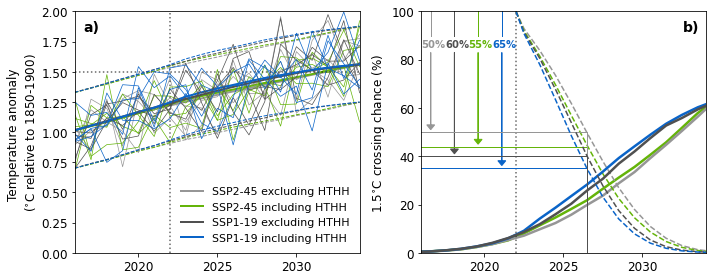

In [33]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(np.arange(2015,2035), np.percentile(background_temps,5,axis=1), color=color2, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(background_temps,95,axis=1), color=color2, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(tonga_temps_narrowspread,5,axis=1), color=color1, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(tonga_temps_narrowspread,95,axis=1), color=color1, linewidth=1, alpha=1, linestyle='--')

ax[0].plot(np.arange(2015,2035), np.mean(background_temps,axis=1), color=color2, linewidth=2, alpha=1, label='SSP2-45 excluding HTHH')
ax[0].plot(np.arange(2015,2035), np.mean(tonga_temps_narrowspread,axis=1), color=color1, linewidth=2, alpha=1, label='SSP2-45 including HTHH')

ax[0].plot(np.arange(2015,2035), background_temps[:,1500::10000], color=color2, linewidth=0.7, alpha=1)
ax[0].plot(np.arange(2015,2035), tonga_temps_narrowspread[:,1500::10000], color=color1, linewidth=0.7, alpha=1)

l = ax[0].set_xticks([2015,2020,2025,2030,2035])

ax[1].plot(np.arange(2015,2035)+0.5, 100*np.sum(tonga_temps_narrowspread>1.5, axis=1)/n, color=color1, linewidth=2.5)
ax[1].plot(np.arange(2015,2035)+0.5, 100*np.sum(background_temps>1.5, axis=1)/n, color=color2, linewidth=2.5)

l = ax[1].set_xticks([2015,2020,2025,2030,2035])

ax[0].legend(loc='lower right', framealpha=0.0, edgecolor='none', fontsize=11)

ax[0].set_ylabel('Temperature anomaly \n($^{\circ}$C relative to 1850-1900)', fontsize=12)
ax[1].set_ylabel('1.5$^{\circ}$C crossing chance (%)', fontsize=12)

ax[0].set_xlim(2015,2034)
ax[1].set_xlim(2015,2034)

ax[0].axvline(x=2022, color='black', linestyle=':', alpha=0.6)
ax[1].axvline(x=2022, color='black', linestyle=':', alpha=0.6)

ax[0].axhline(y=1.5, color='black', linestyle=':', alpha=0.6)

ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

print(1 - np.sum(background_temps[7:12]>1.5, axis=1)/n)

print(1 - np.prod(1 - np.sum(background_temps[7:12]>1.5, axis=1)/n))
print(1 - np.prod(1 - np.sum(tonga_temps_narrowspread[7:12]>1.5, axis=1)/n))

background_cum_prod_15_not_exceeded = np.zeros(2035-2022+1)
background_cum_prod_15_not_exceeded[0] = 100
background_cum_prod_15_not_exceeded[1:] = 100*np.cumprod(1 - np.sum(background_temps[7:]>1.5, axis=1)/n)
tonga_cum_prod_15_not_exceeded = np.zeros(2035-2022+1)
tonga_cum_prod_15_not_exceeded[0] = 100
tonga_cum_prod_15_not_exceeded[1:] = 100*np.cumprod(1 - np.sum(tonga_temps_narrowspread[7:]>1.5, axis=1)/n)
ax[1].plot([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], background_cum_prod_15_not_exceeded, color=color2, linestyle='--')
ax[1].plot([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], tonga_cum_prod_15_not_exceeded, color=color1, linestyle='--')



ax[1].text(2016,85,str(np.round(100 - 100*np.prod(1 - np.sum(background_temps[7:12]>1.5, axis=1)/n),0))[:-2]+'%', fontweight='bold', color=color2)
ax[1].text(2019,85,str(np.round(100 - 100*np.prod(1 - np.sum(tonga_temps_narrowspread[7:12]>1.5, axis=1)/n),0))[:-2]+'%', fontweight='bold', color=color1)
ax[1].plot([2016.6,2016.6],[100,90], color=color2, linewidth=1.0, alpha=1, linestyle='-')
ax[1].plot([2019.6,2019.6],[100,90], color=color1, linewidth=1.0, alpha=1, linestyle='-')

ax[1].arrow(2016.6,83,0,-30, head_width=0.5, head_length=2, linestyle='-', color=color2, linewidth=1.0, alpha=1)
ax[1].arrow(2019.6,83,0,-36, head_width=0.5, head_length=2, linestyle='-', color=color1, linewidth=1.0, alpha=1)

ax[1].set_ylim(0,100)
ax[1].set_xlim(2016,2034)

ax[0].set_ylim(0,2.0)

ax[1].plot([2014.5,2026.5],[100-56,100-56], color=color1, alpha=1, linewidth=1.0)
ax[1].plot([2014.5,2026.5],[100-50,100-50], color=color2, alpha=1, linewidth=1.0)

ax[1].plot([2026.5,2026.5],[0,100-56], color=color1, alpha=1, linewidth=1.0)
ax[1].plot([2026.5,2026.5],[0,100-50], color=color2, alpha=1, linewidth=1.0)

fig.tight_layout()

# fig.savefig('increased_risk.png', dpi=400, bbox_inches='tight')










ax[0].plot(np.arange(2015,2035), np.percentile(background_temps_19,5,axis=1), color=color4, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(background_temps_19,95,axis=1), color=color4, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(tonga_temps_19_narrowspread,5,axis=1), color=color5, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(tonga_temps_19_narrowspread,95,axis=1), color=color5, linewidth=1, alpha=1, linestyle='--')

ax[0].plot(np.arange(2015,2035), np.mean(background_temps_19,axis=1), color=color4, linewidth=2, alpha=1, label='SSP1-19 excluding HTHH')
ax[0].plot(np.arange(2015,2035), np.mean(tonga_temps_19_narrowspread,axis=1), color=color5, linewidth=2, alpha=1, label='SSP1-19 including HTHH')

ax[0].plot(np.arange(2015,2035), background_temps_19[:,1500::10000], color=color4, linewidth=0.7, alpha=1)
ax[0].plot(np.arange(2015,2035), tonga_temps_19_narrowspread[:,1500::10000], color=color5, linewidth=0.7, alpha=1)

l = ax[0].set_xticks([2015,2020,2025,2030,2035])

ax[1].plot(np.arange(2015,2035)+0.5, 100*np.sum(tonga_temps_19_narrowspread>1.5, axis=1)/n, color=color5, linewidth=2.5)
ax[1].plot(np.arange(2015,2035)+0.5, 100*np.sum(background_temps_19>1.5, axis=1)/n, color=color4, linewidth=2.5)

l = ax[1].set_xticks([2015,2020,2025,2030,2035])

ax[0].legend(loc='lower right', framealpha=0.0, edgecolor='none', fontsize=11)

print(1 - np.sum(background_temps_19[7:12]>1.5, axis=1)/n)

print(1 - np.prod(1 - np.sum(background_temps_19[7:12]>1.5, axis=1)/n))
print(1 - np.prod(1 - np.sum(tonga_temps_19_narrowspread[7:12]>1.5, axis=1)/n))

background_cum_prod_15_not_exceeded_19 = np.zeros(2035-2022+1)
background_cum_prod_15_not_exceeded_19[0] = 100
background_cum_prod_15_not_exceeded_19[1:] = 100*np.cumprod(1 - np.sum(background_temps_19[7:]>1.5, axis=1)/n)
tonga_cum_prod_15_not_exceeded_19 = np.zeros(2035-2022+1)
tonga_cum_prod_15_not_exceeded_19[0] = 100
tonga_cum_prod_15_not_exceeded_19[1:] = 100*np.cumprod(1 - np.sum(tonga_temps_19_narrowspread[7:]>1.5, axis=1)/n)
ax[1].plot([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], background_cum_prod_15_not_exceeded_19, color=color4, linestyle='--')
ax[1].plot([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], tonga_cum_prod_15_not_exceeded_19, color=color5, linestyle='--')



ax[1].text(2017.5,85,str(np.round(100 - 100*np.prod(1 - np.sum(background_temps_19[7:12]>1.5, axis=1)/n),0))[:-2]+'%', fontweight='bold', color=color4)
ax[1].text(2020.5,85,str(np.round(100 - 100*np.prod(1 - np.sum(tonga_temps_19_narrowspread[7:12]>1.5, axis=1)/n),0))[:-2]+'%', fontweight='bold', color=color5)
ax[1].plot([2018.1,2018.1],[100,90], color=color4, linewidth=1.0, alpha=1, linestyle='-')
ax[1].plot([2021.1,2021.1],[100,90], color=color5, linewidth=1.0, alpha=1, linestyle='-')

ax[1].arrow(2018.1,83,0,-40, head_width=0.5, head_length=2, linestyle='-', color=color4, linewidth=1.0, alpha=1)
ax[1].arrow(2021.1,83,0,-44.85, head_width=0.5, head_length=2, linestyle='-', color=color5, linewidth=1.0, alpha=1)

ax[1].set_ylim(0,100)
ax[1].set_xlim(2016,2034)

ax[0].set_xlim(2016,2034)
ax[0].set_ylim(0,2.0)

ax[1].plot([2014.5,2026.5],[100-65,100-65], color=color5, alpha=1, linewidth=1.0)
ax[1].plot([2014.5,2026.5],[100-60,100-60], color=color4, alpha=1, linewidth=1.0)

ax[1].plot([2026.5,2026.5],[0,100-65], color=color5, alpha=1, linewidth=1.0)
ax[1].plot([2026.5,2026.5],[0,100-60], color=color4, alpha=1, linewidth=1.0)

ax[0].text(0.03,0.92, 'a)', fontweight='bold', fontsize=14, transform=ax[0].transAxes)
ax[1].text(0.92,0.92, 'b)', fontweight='bold', fontsize=14, transform=ax[1].transAxes)

fig.tight_layout()

# fig.savefig('increased_risk_narrowspread.png', dpi=400, bbox_inches='tight')




[0.929   0.90256 0.87654 0.84212 0.80166]
0.5038331645409151
0.574336519624
[0.9139  0.88146 0.84032 0.79668 0.7419 ]
0.5998938082102474
0.6668330570376213


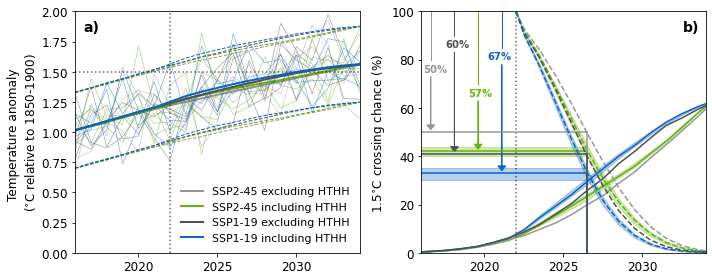

In [39]:
# try to incorporate all three in the RH panel

fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(np.arange(2015,2035), background_temps[:,1500::15000], color=color2, linewidth=0.7, alpha=0.5)
ax[0].plot(np.arange(2015,2035), tonga_temps[:,1500::15000], color=color1, linewidth=0.7, alpha=0.5)

ax[0].plot(np.arange(2015,2035), np.percentile(background_temps,5,axis=1), color=color2, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(background_temps,95,axis=1), color=color2, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(tonga_temps,5,axis=1), color=color1, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(tonga_temps,95,axis=1), color=color1, linewidth=1, alpha=1, linestyle='--')

ax[0].plot(np.arange(2015,2035), np.mean(background_temps,axis=1), color=color2, linewidth=2, alpha=1, label='SSP2-45 excluding HTHH')
ax[0].plot(np.arange(2015,2035), np.mean(tonga_temps,axis=1), color=color1, linewidth=2, alpha=1, label='SSP2-45 including HTHH')

l = ax[0].set_xticks([2015,2020,2025,2030,2035])

ax[1].plot(np.arange(2015,2035)+0.5, 100*np.sum(tonga_temps>1.5, axis=1)/n, color=color1, linewidth=1.5)
ax[1].plot(np.arange(2015,2035)+0.5, 100*np.sum(background_temps>1.5, axis=1)/n, color=color2, linewidth=1.5)

ax[1].fill_between(np.arange(2015,2035)+0.5, 100*np.sum(tonga_temps_largespread>1.5, axis=1)/n, 100*np.sum(tonga_temps_narrowspread>1.5, axis=1)/n, color=color1, alpha=0.3)

l = ax[1].set_xticks([2015,2020,2025,2030,2035])

ax[0].legend(loc='lower right', framealpha=0.0, edgecolor='none', fontsize=11)

ax[0].set_ylabel('Temperature anomaly \n($^{\circ}$C relative to 1850-1900)', fontsize=12)
ax[1].set_ylabel('1.5$^{\circ}$C crossing chance (%)', fontsize=12)

ax[0].set_xlim(2015,2034)
ax[1].set_xlim(2015,2034)

ax[0].axvline(x=2022, color='black', linestyle=':', alpha=0.6)
ax[1].axvline(x=2022, color='black', linestyle=':', alpha=0.6)

ax[0].axhline(y=1.5, color='black', linestyle=':', alpha=0.6)

ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)

print(1 - np.sum(background_temps[7:12]>1.5, axis=1)/n)

print(1 - np.prod(1 - np.sum(background_temps[7:12]>1.5, axis=1)/n))
print(1 - np.prod(1 - np.sum(tonga_temps[7:12]>1.5, axis=1)/n))

background_cum_prod_15_not_exceeded = np.zeros(2035-2022+1)
background_cum_prod_15_not_exceeded[0] = 100
background_cum_prod_15_not_exceeded[1:] = 100*np.cumprod(1 - np.sum(background_temps[7:]>1.5, axis=1)/n)
tonga_cum_prod_15_not_exceeded = np.zeros(2035-2022+1)
tonga_cum_prod_15_not_exceeded[0] = 100
tonga_cum_prod_15_not_exceeded[1:] = 100*np.cumprod(1 - np.sum(tonga_temps[7:]>1.5, axis=1)/n)
ax[1].plot([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], background_cum_prod_15_not_exceeded, color=color2, linestyle='--')
ax[1].plot([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], tonga_cum_prod_15_not_exceeded, color=color1, linestyle='--')

tonga_cum_prod_15_not_exceeded_narrowspread = np.zeros(2035-2022+1)
tonga_cum_prod_15_not_exceeded_narrowspread[0] = 100
tonga_cum_prod_15_not_exceeded_narrowspread[1:] = 100*np.cumprod(1 - np.sum(tonga_temps_narrowspread[7:]>1.5, axis=1)/n)
tonga_cum_prod_15_not_exceeded_largespread = np.zeros(2035-2022+1)
tonga_cum_prod_15_not_exceeded_largespread[0] = 100
tonga_cum_prod_15_not_exceeded_largespread[1:] = 100*np.cumprod(1 - np.sum(tonga_temps_largespread[7:]>1.5, axis=1)/n)
ax[1].fill_between([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], tonga_cum_prod_15_not_exceeded_narrowspread, tonga_cum_prod_15_not_exceeded_largespread, color=color1, alpha=0.3)

ax[1].text(2016.1,85-10,str(np.round(100 - 100*np.prod(1 - np.sum(background_temps[7:12]>1.5, axis=1)/n),0))[:-2]+'%', fontweight='bold', color=color2)
ax[1].text(2019,85-20,str(np.round(100 - 100*np.prod(1 - np.sum(tonga_temps[7:12]>1.5, axis=1)/n),0))[:-2]+'%', fontweight='bold', color=color1)
ax[1].plot([2016.6,2016.6],[100,90-10], color=color2, linewidth=1.0, alpha=1, linestyle='-')
ax[1].plot([2019.6,2019.6],[100,90-20], color=color1, linewidth=1.0, alpha=1, linestyle='-')

ax[1].arrow(2016.6,83-10,0,-30+10, head_width=0.5, head_length=2, linestyle='-', color=color2, linewidth=1.0, alpha=1)
ax[1].arrow(2019.6,83-20,0,-38+20, head_width=0.5, head_length=2, linestyle='-', color=color1, linewidth=1.0, alpha=1)

ax[1].set_ylim(0,100)
ax[1].set_xlim(2016,2034)

ax[0].set_ylim(0,2.0)

ax[1].plot([2014.5,2026.5],[100-58,100-58], color=color1, alpha=1, linewidth=1.5)
ax[1].fill_between([2014.5,2026.5],[100-56,100-56],[100-60,100-60], color=color1, alpha=0.3)
ax[1].plot([2014.5,2026.5],[100-50,100-50], color=color2, alpha=1, linewidth=1.5)

ax[1].plot([2026.5,2026.5],[0,100-58], color=color1, alpha=1, linewidth=1.5)
ax[1].plot([2026.5,2026.5],[0,100-50], color=color2, alpha=1, linewidth=1.5)

fig.tight_layout()

# fig.savefig('increased_risk.png', dpi=400, bbox_inches='tight')










ax[0].plot(np.arange(2015,2035), background_temps_19[:,1500::15000], color=color4, linewidth=0.7, alpha=0.5)
ax[0].plot(np.arange(2015,2035), tonga_temps_19[:,1500::15000], color=color5, linewidth=0.7, alpha=0.5)

ax[0].plot(np.arange(2015,2035), np.percentile(background_temps_19,5,axis=1), color=color4, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(background_temps_19,95,axis=1), color=color4, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(tonga_temps_19,5,axis=1), color=color5, linewidth=1, alpha=1, linestyle='--')
ax[0].plot(np.arange(2015,2035), np.percentile(tonga_temps_19,95,axis=1), color=color5, linewidth=1, alpha=1, linestyle='--')

ax[0].plot(np.arange(2015,2035), np.mean(background_temps_19,axis=1), color=color4, linewidth=2, alpha=1, label='SSP1-19 excluding HTHH')
ax[0].plot(np.arange(2015,2035), np.mean(tonga_temps_19,axis=1), color=color5, linewidth=2, alpha=1, label='SSP1-19 including HTHH')

l = ax[0].set_xticks([2015,2020,2025,2030,2035])

ax[1].plot(np.arange(2015,2035)+0.5, 100*np.sum(tonga_temps_19>1.5, axis=1)/n, color=color5, linewidth=1.5)
ax[1].plot(np.arange(2015,2035)+0.5, 100*np.sum(background_temps_19>1.5, axis=1)/n, color=color4, linewidth=1.5)

ax[1].fill_between(np.arange(2015,2035)+0.5, 100*np.sum(tonga_temps_19_largespread>1.5, axis=1)/n, 100*np.sum(tonga_temps_19_narrowspread>1.5, axis=1)/n, color=color5, alpha=0.3)

l = ax[1].set_xticks([2015,2020,2025,2030,2035])

ax[0].legend(loc='lower right', framealpha=0.0, edgecolor='none', fontsize=11)

print(1 - np.sum(background_temps_19[7:12]>1.5, axis=1)/n)

print(1 - np.prod(1 - np.sum(background_temps_19[7:12]>1.5, axis=1)/n))
print(1 - np.prod(1 - np.sum(tonga_temps_19[7:12]>1.5, axis=1)/n))

background_cum_prod_15_not_exceeded_19 = np.zeros(2035-2022+1)
background_cum_prod_15_not_exceeded_19[0] = 100
background_cum_prod_15_not_exceeded_19[1:] = 100*np.cumprod(1 - np.sum(background_temps_19[7:]>1.5, axis=1)/n)
tonga_cum_prod_15_not_exceeded_19 = np.zeros(2035-2022+1)
tonga_cum_prod_15_not_exceeded_19[0] = 100
tonga_cum_prod_15_not_exceeded_19[1:] = 100*np.cumprod(1 - np.sum(tonga_temps_19[7:]>1.5, axis=1)/n)
ax[1].plot([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], background_cum_prod_15_not_exceeded_19, color=color4, linestyle='--')
ax[1].plot([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], tonga_cum_prod_15_not_exceeded_19, color=color5, linestyle='--')

tonga_cum_prod_15_not_exceeded_19_narrowspread = np.zeros(2035-2022+1)
tonga_cum_prod_15_not_exceeded_19_narrowspread[0] = 100
tonga_cum_prod_15_not_exceeded_19_narrowspread[1:] = 100*np.cumprod(1 - np.sum(tonga_temps_19_narrowspread[7:]>1.5, axis=1)/n)
tonga_cum_prod_15_not_exceeded_19_largespread = np.zeros(2035-2022+1)
tonga_cum_prod_15_not_exceeded_19_largespread[0] = 100
tonga_cum_prod_15_not_exceeded_19_largespread[1:] = 100*np.cumprod(1 - np.sum(tonga_temps_19_largespread[7:]>1.5, axis=1)/n)
ax[1].fill_between([2022,2022.5,2023.5,2024.5,2025.5,2026.5,2027.5,2028.5,2029.5,2030.5,2031.5,2032.5,2033.5,2034.5], tonga_cum_prod_15_not_exceeded_19_narrowspread, tonga_cum_prod_15_not_exceeded_19_largespread, color=color5, alpha=0.3)


ax[1].text(2017.5,85,str(np.round(100 - 100*np.prod(1 - np.sum(background_temps_19[7:12]>1.5, axis=1)/n),0))[:-2]+'%', fontweight='bold', color=color4)
ax[1].text(2020.2,85-5,str(np.round(100 - 100*np.prod(1 - np.sum(tonga_temps_19[7:12]>1.5, axis=1)/n),0))[:-2]+'%', fontweight='bold', color=color5)
ax[1].plot([2018.1,2018.1],[100,90], color=color4, linewidth=1.0, alpha=1, linestyle='-')
ax[1].plot([2021.1,2021.1],[100,90-5], color=color5, linewidth=1.0, alpha=1, linestyle='-')

ax[1].arrow(2018.1,83,0,-39, head_width=0.5, head_length=2, linestyle='-', color=color4, linewidth=1.0, alpha=1, zorder=100)
ax[1].arrow(2021.1,83-5,0,-47+5, head_width=0.5, head_length=2, linestyle='-', color=color5, linewidth=1.0, alpha=1)

ax[1].set_ylim(0,100)
ax[1].set_xlim(2016,2034)

ax[0].set_xlim(2016,2034)
ax[0].set_ylim(0,2.0)

ax[1].plot([2014.5,2026.5],[100-67,100-67], color=color5, alpha=1, linewidth=1.5)
ax[1].fill_between([2014.5,2026.5],[100-65,100-65],[100-70,100-70], color=color5, alpha=0.3)
ax[1].plot([2014.5,2026.5],[100-59,100-59], color=color4, alpha=1, linewidth=1.5)

ax[1].plot([2026.5,2026.5],[0,100-67], color=color5, alpha=1, linewidth=1.5)
ax[1].plot([2026.5,2026.5],[0,100-59], color=color4, alpha=1, linewidth=1.5)

ax[0].text(0.03,0.92, 'a)', fontweight='bold', fontsize=14, transform=ax[0].transAxes)
ax[1].text(0.92,0.92, 'b)', fontweight='bold', fontsize=14, transform=ax[1].transAxes)

fig.tight_layout()

# fig.savefig('increased_risk_allspreads_newcolours.pdf', dpi=500, bbox_inches='tight')


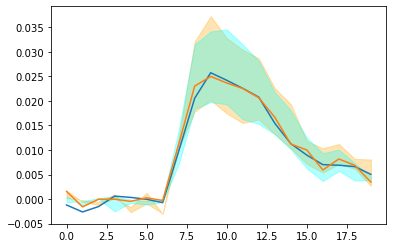

In [36]:
plt.plot(np.mean(tonga_temps,axis=1) - np.mean(background_temps,axis=1))
plt.plot(np.mean(tonga_temps_19,axis=1) - np.mean(background_temps_19,axis=1))

plt.fill_between(np.arange(0,20), np.mean(tonga_temps_narrowspread,axis=1) - np.mean(background_temps,axis=1), np.mean(tonga_temps_largespread,axis=1) - np.mean(background_temps,axis=1), color='orange', alpha=0.3)
plt.fill_between(np.arange(0,20), np.mean(tonga_temps_19_narrowspread,axis=1) - np.mean(background_temps_19,axis=1), np.mean(tonga_temps_19_largespread,axis=1) - np.mean(background_temps_19,axis=1), color='cyan', alpha=0.3)

In [159]:
year_vals = IRF_calc_checks['Unnamed: 0'].values

default_vals = IRF_calc_checks['default'].values
onelevup_vals = IRF_calc_checks['onelevup'].values
onelevdown_vals = IRF_calc_checks['onelevdown'].values
highspread_vals = IRF_calc_checks['highspread'].values
widespread_vals = IRF_calc_checks['widespread'].values
narrowspread_vals = IRF_calc_checks['narrowspread'].values

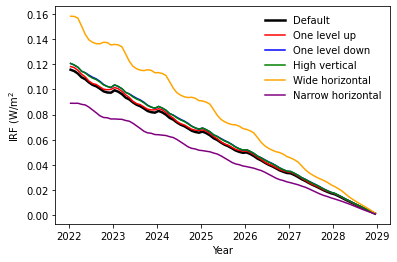

In [166]:
plt.plot(year_vals, default_vals, color='black', linewidth=2.5, label='Default')
plt.plot(year_vals, onelevup_vals, color='red', linewidth=1.5, label='One level up')
plt.plot(year_vals, onelevdown_vals, color='blue', linewidth=1.5, label='One level down')
plt.plot(year_vals, highspread_vals, color='green', linewidth=1.5, label='High vertical')
plt.plot(year_vals, widespread_vals, color='orange', linewidth=1.5, label='Wide horizontal')
plt.plot(year_vals, narrowspread_vals, color='purple', linewidth=1.5, label='Narrow horizontal')

plt.xlabel('Year')
plt.ylabel('IRF (W/m$^2$')

plt.legend(loc='upper right', edgecolor='none')

# plt.savefig('IRF_perturbation.png', dpi=300, bbox_inches='tight')